In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('classic')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [35]:
#Global Constants
AREA = (20.5-0.5)*(20.341234-0.288675)

In [36]:
#readin histogram data
#assume only 1 dump 
def readvel(file):
    f = open(file)
    heading=None
    count,res=0,[]
    for line in f:
        if line.startswith("#"):
            continue
        wd=line.split()
        if not heading: #heading not defined
            heading=wd
        else:
            count+=1
            wd=map(float,wd)
            res.append([int(heading[0])]+wd) #add as line with step info
            if count == int(heading[1]):
                count=0
                heading=None
    f.close()
    return res

In [37]:
#file path setting
folder1 = "/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Diblock/6/e05/v048/"
folder2 = "/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Nofiller/e05/v048/"
#folder3 = "/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Sheet/12/e05/v48/"
folder4 = "/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Spherical/s05/50/e05/v48/"

In [38]:
filename="V_P_mobile2.txt"
f1 = folder1+filename
f2 = folder2+filename
#f3 = folder3+filename
f4 = folder4+filename
res1 = readvel(f1)
res2 = readvel(f2)
#res3 = readvel(f3)
res4 = readvel(f4)

In [39]:
vel1=pd.DataFrame(res1,columns = ["step","binID","cord","N","vx","pxz"])
vel2=pd.DataFrame(res2,columns = ["step","binID","cord","N","vx","pxz"])
#vel3=pd.DataFrame(res3,columns = ["step","binID","cord","N","vx","pxz"])
vel4=pd.DataFrame(res4,columns = ["step","binID","cord","N","vx","pxz"])
binsize=vel1.iloc[1,2]-vel1.iloc[0,2]

In [40]:
sample1 = vel1[vel1.step==50000000]
sample2 = vel2[vel2.step==50000000]
#sample3 = vel3[vel3.step==50000000]
sample4 = vel4[vel4.step==50000000]

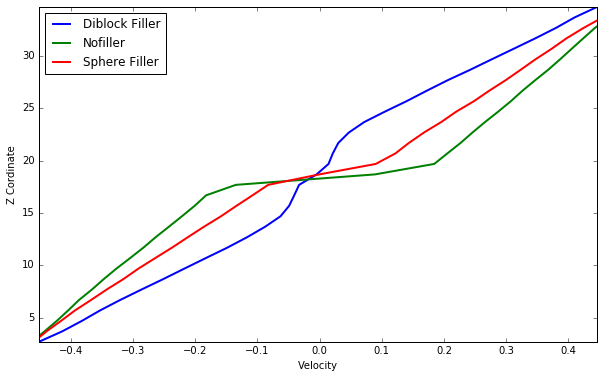

In [41]:
line1=plt.plot(sample1.vx,sample1.cord,"-",linewidth=2,label="Diblock Filler")
line2=plt.plot(sample2.vx,sample2.cord,"-",linewidth=2,label="Nofiller")
#line3=plt.plot(sample3.vx,sample3.cord,"-",linewidth=2,label="Sheet Filler")
line4=plt.plot(sample4.vx,sample4.cord,"-",linewidth=2,label="Sphere Filler")
plt.xlim(sample1.vx.iloc[3],sample1.vx.iloc[-4])
plt.ylim(sample1.cord.iloc[3],sample1["cord"].iloc[-4])
plt.xlabel("Velocity")
plt.ylabel("Z Cordinate")
plt.legend(loc="best")
plt.savefig("Velocity",dpi=300)
plt.show()